In [1]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import mplfinance as mpf
from tensorflow import keras
from sklearn.model_selection import train_test_split
pd.options.mode.chained_assignment = None  # default='warn'
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# OLD STUFF

In [62]:
stock_name = "AZN"

In [63]:
def prepare_data(stock_name, period="5y", interval="1d", with_today=False,back_time=5):

    recent_data = yf.download(stock_name, period=period, interval=interval)
    data_200 = yf.download(stock_name, period="5y", interval="1d").tail(len(recent_data) + 200)
    data_200 = data_200.drop(columns=["Adj Close"])

    data_200["last_close"] = data_200["Close"].shift(1)
    data_200.fillna(method="bfill", inplace=True)

    data_200["movement"] = data_200["Close"] - data_200["Open"]

    data_200["200_day"] = data_200["Close"].rolling(window=200).mean()

    recent_data = data_200.tail(len(recent_data))
    if not with_today:
        recent_data = recent_data.iloc[:-1]

    for i in range(back_time):
        recent_data[f"Open t - {i+1}"] = recent_data["Open"].shift(-(i+1))
        recent_data[f"Close t - {i+1}"] = recent_data["Close"].shift(-(i+1))
        recent_data[f"High t - {i+1}"] = recent_data["High"].shift(-(i+1))
        recent_data[f"Low t - {i+1}"] = recent_data["Low"].shift(-(i+1))
    recent_data = recent_data.dropna()
    # add_plot = mpf.make_addplot(recent_data["200_day"], color="blue", linestyle="--")

    return recent_data

prepare_data(stock_name, "1y")

[*********************100%%**********************]  1 of 1 completed


KeyboardInterrupt: 

In [ ]:
recent_data = prepare_data(stock_name, "1y")
recent_data

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
C:\Users\USER\AppData\Local\Temp\ipykernel_29064\146692530.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_200.fillna(method="bfill", inplace=True)


,Open,High,Low,Close,Volume,last_close,movement,200_day,Open t - 1,Close t - 1,...,High t - 3,Low t - 3,Open t - 4,Close t - 4,High t - 4,Low t - 4,Open t - 5,Close t - 5,High t - 5,Low t - 5
Date,,,,,,,,,,,,,,,,,,,,,
2023-08-09,70.889999,71.559998,70.830002,71.279999,4324200,70.480003,0.389999,68.75720,71.040001,70.339996,...,70.910004,69.940002,69.940002,69.510002,70.120003,69.339996,68.949997,69.709999,70.029999,68.919998
2023-08-10,71.040001,71.510002,70.330002,70.339996,3876600,71.279999,-0.700005,68.83405,69.699997,70.370003,...,70.120003,69.339996,68.949997,69.709999,70.029999,68.919998,69.239998,69.120003,69.769997,69.120003
2023-08-11,69.699997,70.580002,69.540001,70.370003,3549700,70.339996,0.670006,68.91000,70.029999,70.839996,...,70.029999,68.919998,69.239998,69.120003,69.769997,69.120003,68.370003,68.459999,68.779999,68.099998
2023-08-14,70.029999,70.910004,69.940002,70.839996,3843100,70.370003,0.809998,68.98470,69.940002,69.510002,...,69.769997,69.120003,68.370003,68.459999,68.779999,68.099998,68.980003,68.879997,69.139999,68.519997
2023-08-15,69.940002,70.120003,69.339996,69.510002,4243800,70.839996,-0.430000,69.04245,68.949997,69.709999,...,68.779999,68.099998,68.980003,68.879997,69.139999,68.519997,68.809998,68.769997,68.970001,68.389999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-26,78.480003,79.449997,78.080002,78.129997,5878400,78.519997,-0.350006,69.79240,80.059998,78.360001,...,79.559998,78.529999,79.650002,81.199997,81.400002,79.620003,81.599998,81.809998,82.010002,80.830002
2024-07-29,80.059998,80.120003,78.330002,78.360001,6753900,78.129997,-1.699997,69.84415,78.699997,77.900002,...,81.400002,79.620003,81.599998,81.809998,82.010002,80.830002,78.879997,79.330002,80.129997,78.690002
2024-07-30,78.699997,78.989998,77.470001,77.900002,6480800,78.360001,-0.799995,69.89360,79.129997,79.150002,...,82.010002,80.830002,78.879997,79.330002,80.129997,78.690002,78.250000,79.250000,79.730003,78.220001


In [ ]:
X = recent_data.drop(columns=["Close", "movement","Volume"])
print(X)
y = recent_data["movement"]

train_X,val_X,train_y,val_y = train_test_split(X,y,random_state = 1)

input_shape = [5]



early_stopping = callbacks.EarlyStopping(

    min_delta=0.0001, # minimium amount of change to count as an improvement

    patience=40, # how many epochs to wait before stopping

    restore_best_weights=True,
)



model = keras.Sequential(
    [

        layers.Dense(128, activation="relu", input_shape=input_shape),
        layers.Dropout(0.3),
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.3),

        layers.Dense(1),

    ]
)



optimizer = keras.optimizers.Adam(learning_rate=0.01)

model.compile(


    optimizer=optimizer,
    loss="mse",
)
EPOCHS = 100
history = model.fit(

    train_X, train_y,

    validation_data=(val_X, val_y),

    batch_size=64,

    epochs=EPOCHS,

    callbacks=[early_stopping],

    verbose=0,
    
)

NameError: name 'recent_data' is not defined

In [ ]:
check_data = prepare_data(stock_name, "5d", "1d", True)

print(check_data)
check_X = check_data.drop(columns=["Close","Volume", "movement"])
# print(checl_data.head())
print(check_X.tail(1))

print(model.predict(check_X.tail(1)))
print(check_X.tail(1).Open[0] + model.predict(check_X.tail(1))[0])

NameError: name 'yf' is not defined

Minimum validation loss: 0.35956647992134094


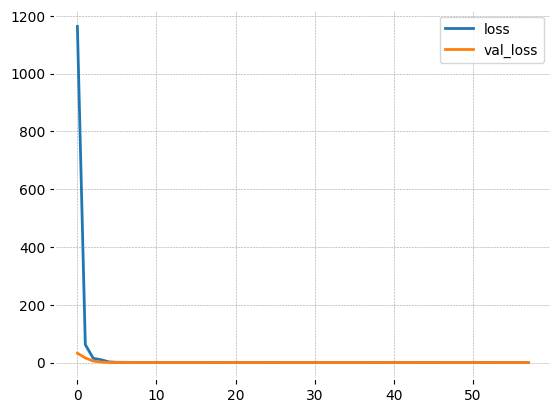

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [ ]:
recent_data.head()


,Open,High,Low,Close,Volume,last_close,movement,200_day
Date,,,,,,,,
2023-08-09,180.869995,180.929993,177.009995,178.190002,60378500,179.800003,-2.679993,160.5426
2023-08-10,179.479996,180.750000,177.600006,177.970001,54686900,178.190002,-1.509995,160.6961
2023-08-11,177.320007,178.619995,176.550003,177.789993,51988100,177.970001,0.469986,160.8378
2023-08-14,177.970001,179.690002,177.309998,179.460007,43675600,177.789993,1.490005,160.9734
2023-08-15,178.880005,179.479996,177.050003,177.449997,43622600,179.460007,-1.430008,161.1139


# NEW THINGS

In [184]:
stock_name = "AAPL"

In [185]:
def prepare_data(stock_name, period="5d", interval="1m",back_time=5):

    recent_data = yf.download(stock_name, period=period, interval=interval)
    data_200 = yf.download(stock_name, period=period, interval=interval).tail(len(recent_data) + 200)
    data_200 = data_200.drop(columns=["Adj Close"])

    data_200.fillna(method="bfill", inplace=True)

   # recent_data = data_200.tail(len(recent_data))

    recent_data = recent_data.iloc[:-1]

    for i in range(back_time):
        recent_data[f"Open t - {i+1}"] = recent_data["Open"].shift((i+1))
        recent_data[f"Close t - {i+1}"] = recent_data["Close"].shift((i+1))
        recent_data[f"High t - {i+1}"] = recent_data["High"].shift((i+1))
        recent_data[f"Low t - {i+1}"] = recent_data["Low"].shift((i+1))
    recent_data = recent_data.dropna()

       
    # add_plot = mpf.make_addplot(recent_data["200_day"], color="blue", linestyle="--")

    return recent_data

recent_data = prepare_data(stock_name,back_time=10,period="5d",interval="1m")

recent_data.head()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Open t - 1,Close t - 1,High t - 1,Low t - 1,...,High t - 8,Low t - 8,Open t - 9,Close t - 9,High t - 9,Low t - 9,Open t - 10,Close t - 10,High t - 10,Low t - 10
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-08-05 09:40:00-04:00,209.184998,210.000000,208.869400,208.979996,208.979996,993499,207.800003,209.235001,209.300003,207.679993,...,204.759995,202.503998,198.949997,202.539993,202.600006,198.279999,199.139999,197.660004,199.139999,196.210007
2024-08-05 09:41:00-04:00,209.000000,209.509995,207.544998,207.669998,207.669998,878502,209.184998,208.979996,210.000000,208.869400,...,206.139999,203.750000,202.563995,204.350006,204.759995,202.503998,198.949997,202.539993,202.600006,198.279999
2024-08-05 09:42:00-04:00,207.645004,208.990005,207.500000,208.619995,208.619995,579552,209.000000,207.669998,209.509995,207.544998,...,206.779999,205.009995,204.339996,205.899994,206.139999,203.750000,202.563995,204.350006,204.759995,202.503998
2024-08-05 09:43:00-04:00,208.649994,209.580002,207.919998,208.020004,208.020004,608393,207.645004,208.619995,208.990005,207.500000,...,206.940002,204.190002,205.899994,205.610001,206.779999,205.009995,204.339996,205.899994,206.139999,203.750000
2024-08-05 09:44:00-04:00,208.032303,208.690002,207.440796,208.550003,208.550003,547275,208.649994,208.020004,209.580002,207.919998,...,206.139999,204.589996,205.687897,204.710007,206.940002,204.190002,205.899994,205.610001,206.779999,205.009995


In [186]:
from sklearn.model_selection import train_test_split
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"

X = recent_data.drop(["Close", "Volume", "High", "Low"], axis=1)
y = recent_data[["Close", "High", "Low"]]

X_tensor = torch.from_numpy(X.values)
y_tensor = torch.from_numpy(y.values)


X_train,X_test,y_train,y_test = train_test_split(X_tensor,y_tensor,test_size=0.2)
X_train = X_train.to(torch.float32).to(device)
# X_time_step = [i for i in range(len(X_train))]
X_test= X_test.to(torch.float32).to(device)
y_train = y_train.to(torch.float32).to(device)
y_test =y_test.to(torch.float32).to(device)

In [202]:
class LSTMPredictor(nn.Module):
    def __init__(self, input_size, hidden_size, n_layers=2):
        super(LSTMPredictor, self).__init__()

        self.ltsm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=n_layers,
            batch_first=True,
        )
    def forward(self, sequences):
        lstm_out, (hn, cn) = self.ltsm(sequences)
        return lstm_out
    
model = nn.Sequential(
    
    LSTMPredictor(input_size=42, hidden_size=128, n_layers=10),
    nn.Linear(128, 3),
    
).to(device)

# model(X_train)

In [183]:
X_train

tensor([[215.1800, 215.2800, 215.2650,  ..., 215.1800, 215.2999, 215.1200],
        [215.4700, 215.2550, 215.3750,  ..., 215.3950, 215.4600, 215.2300],
        [215.4100, 215.1800, 215.1200,  ..., 215.5201, 215.6200, 215.4704],
        ...,
        [214.4400, 214.7000, 214.6400,  ..., 214.1603, 214.4199, 214.0801],
        [215.3000, 215.2110, 215.3399,  ..., 215.0100, 215.2000, 215.0100],
        [214.5150, 214.5500, 214.5200,  ..., 214.7100, 214.8700, 214.6600]],
       device='cuda:0')

In [203]:
epochs = 10000

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(epochs):
    model.train()

    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model.eval()
    with torch.inference_mode():
        y_test_pred = model(X_test)
        test_loss = loss_fn(y_test_pred, y_test)
        if epoch % 100 == 0:
            print(f"epoch: {epoch} loss = {loss}, test loss = {test_loss}")

epoch: 0 loss = 44637.24609375, test loss = 44544.82421875
epoch: 100 loss = 12462.283203125, test loss = 12344.6474609375
epoch: 200 loss = 2294.289794921875, test loss = 2282.943359375
epoch: 300 loss = 266.0786437988281, test loss = 273.331787109375
epoch: 400 loss = 27.32117462158203, test loss = 32.70191192626953
epoch: 500 loss = 11.075263977050781, test loss = 14.774625778198242
epoch: 600 loss = 10.420696258544922, test loss = 13.631688117980957
epoch: 700 loss = 10.413107872009277, test loss = 13.579267501831055
epoch: 800 loss = 10.407191276550293, test loss = 13.558797836303711
epoch: 900 loss = 10.400571823120117, test loss = 13.535787582397461
epoch: 1000 loss = 10.393863677978516, test loss = 13.512840270996094
epoch: 1100 loss = 10.386874198913574, test loss = 13.489316940307617
epoch: 1200 loss = 10.379609107971191, test loss = 13.464922904968262
epoch: 1300 loss = 10.37032699584961, test loss = 13.441060066223145
epoch: 1400 loss = 10.36153507232666, test loss = 13.417

In [ ]:
torch.save(model, "model1.pt")

In [189]:
def prepare_test_loop_data(stock_name, period="5d", interval="1m",back_time=5, answers =[]):

    recent_data = yf.download(stock_name, period=period, interval=interval)

    data_200 = yf.download(stock_name, period=period, interval=interval).tail(len(recent_data) + 201)
    data_200 = data_200.drop(columns=["Adj Close"])

    data_200.fillna(method="bfill", inplace=True)

    #recent_data = data_200.tail(len(recent_data))


    recent_data = recent_data.dropna()
    for i in range(back_time):
        recent_data[f"Open t - {i+1}"] = recent_data["Open"].shift((i+1))
        recent_data[f"Close t - {i+1}"] = recent_data["Close"].shift((i+1))
        recent_data[f"High t - {i+1}"] = recent_data["High"].shift((i+1))
        recent_data[f"Low t - {i+1}"] = recent_data["Low"].shift((i+1))

    # recent_data = recent_data.tail(1)
    # add_plot = mpf.make_addplot(recent_data["200_day"], color="blue", linestyle="--")

    return recent_data

#recent_data = prepare_test_loop_data(stock_name,back_time=1,answers=[answer])
#recent_data.head()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


tensor([[212.9511, 212.9993, 212.8799]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
tensor([[212.9511, 212.9993, 212.8799]], device='cuda:0',
       grad_fn=<AddmmBackward0>)


[*********************100%%**********************]  1 of 1 completed

tensor([[212.9511, 212.9993, 212.8799]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
tensor([[212.9511, 212.9993, 212.8799]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
tensor([[212.9511, 212.9993, 212.8799]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
tensor([[212.9511, 212.9993, 212.8799]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
tensor([[212.9511, 212.9993, 212.8799]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
tensor([[212.9511, 212.9993, 212.8799]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
tensor([[212.9511, 212.9993, 212.8799]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
tensor([[212.9511, 212.9993, 212.8799]], device='cuda:0',
       grad_fn=<AddmmBackward0>)



[*********************100%%**********************]  1 of 1 completed


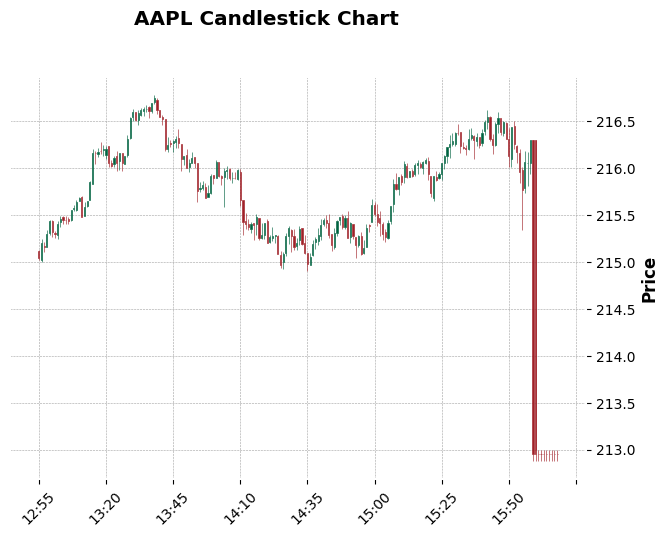

In [204]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

answers = []
forcast = 10
date_range = pd.date_range(
    start=time.index[-1], periods=forcast, freq="1T"
)  # Generate a date range

check_data = prepare_test_loop_data(
    interval="1m", back_time=10, period="1d", stock_name=stock_name
)

for i in range(forcast):
    # for i in answers:

    check_data_last = check_data.tail(1)
    check_X = check_data_last.drop(["Close", "Volume", "High", "Low"], axis=1)
    check_y = check_data_last[["Close", "High", "Low"]]

    # print(check_data.tail(6).to_markdown())
    # print(X.shape)

    check_X_tensor = torch.from_numpy(check_X.values)
    check_y_tensor = torch.from_numpy(check_y.values)

    check_X_tensor = check_X_tensor.to(torch.float32).to(device)
    check_y_tensor = check_y_tensor.to(torch.float32).to(device)

    # print(check_data_last.to_markdown(), "\n\n\n")

    answer = model(check_X_tensor)

    print(answer)

    answer = answer.detach().cpu().numpy()

    answer = np.append(answer[0],check_X["Close t - 1"])
    answers.append(answer)
    df = pd.DataFrame(
        {
            "Close": [answers[-1][0]],
            "High": [answers[-1][1]],
            "Low": [answers[-1][2]],
            "Open": [answers[-1][3]],
            "Adj Close": [0],
            "Volume": [0],
        },
        index=[date_range[i]],
    )

    check_data = check_data._append(df)
    for i in range(10):
        check_data[f"Open t - {i+1}"] = check_data["Open"].shift((i + 1))
        check_data[f"Close t - {i+1}"] = check_data["Close"].shift((i + 1))
        check_data[f"High t - {i+1}"] = check_data["High"].shift((i + 1))
        check_data[f"Low t - {i+1}"] = check_data["Low"].shift((i + 1))
    # check_data.dropna(inplace=True)
# print(check_data.to_markdown())

# print(check_data)
# print(answers)

# sns.catplot(answer[0][:],label="Predicted")
last_elements = [arr[0] for arr in answers]

recent_data = prepare_data(stock_name, period="1d", interval="1m")
# print("Converted index to datetime")

answers_df = pd.concat(
    [
        pd.DataFrame(
            recent_data,
            columns=["Close", "High", "Low", "Open"],
        ),
        pd.DataFrame(
            answers, columns=["Close", "High", "Low", "Open"], index=date_range
        ),
    ]
).iloc[200:]

# print(answers_df.tail(100))

mpf.plot(
    answers_df,
    type="candle",
    style="charles",
    title=f"{stock_name} Candlestick Chart",
    ylabel="Price",
)